# Domácí úkol 1
## 1. Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte pravděpodobnosti znaků (symbolů včetně mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.
Načtení souborů:

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

f1 = open('../source/011.txt', 'r')
f2 = open('../source/006.txt', 'r')

Spočtení pravděpodobností pro každý znak z textů:

In [223]:
def char_probabilities(file) -> list[tuple[str, float]]:
    # Read lines except the first one
    lines = file.readlines()[1:]

    # Parse lines to characters
    chars = []
    for l in lines:
        chars.extend(c for c in l)

    char_count = len(chars)

    # Count char occurrences
    occ = {}
    for c in chars:
        if c in occ:
            occ[c] += 1
        else:
            occ[c] = 1

    # Count char probabilities
    probabilities = {}
    for c, count in occ.items():
        probabilities[c] = count / char_count

    # Sort and return probabilities
    return [(k, v) for k, v in sorted(probabilities.items(), key=lambda item: item[1], reverse=True)]

probabilities1 = char_probabilities(f1)
probabilities2 = char_probabilities(f2)
print('Pravděpodobnosti jednotlivých znaků v textu 1 jsou {}.'.format(probabilities1))
print('Pravděpodobnosti jednotlivých znaků v textu 2 jsou {}.'.format(probabilities2))

Pravděpodobnosti jednotlivých znaků v textu 1 jsou [(' ', 0.20561816103217376), ('e', 0.08835538134901193), ('t', 0.07724971419238935), ('o', 0.07186019924873428), ('a', 0.05879470847623714), ('h', 0.05307855626326964), ('n', 0.0514453699167075), ('i', 0.049158909031520495), ('s', 0.04883227176220807), ('r', 0.04246284501061571), ('d', 0.03935979095214764), ('l', 0.03184713375796178), ('u', 0.025314388371713212), ('m', 0.024661113833088357), ('y', 0.02025151069737057), ('w', 0.019434917524089497), ('f', 0.01649518210027764), ('c', 0.015188633023027927), ('g', 0.014045402580434428), ('p', 0.013228809407153356), ('b', 0.012902172137840928), ('k', 0.010125755348685286), ('v', 0.006859382655560999), ('j', 0.0019598236158745713), ('x', 0.0008165931732810714), ('q', 0.0004899559039686428), ('z', 0.00016331863465621427)].
Pravděpodobnosti jednotlivých znaků v textu 2 jsou [(' ', 0.19557005494505494), ('e', 0.10491071428571429), ('t', 0.06593406593406594), ('n', 0.06301510989010989), ('a', 0.0

Vykreslení praděpodobností do grafu:

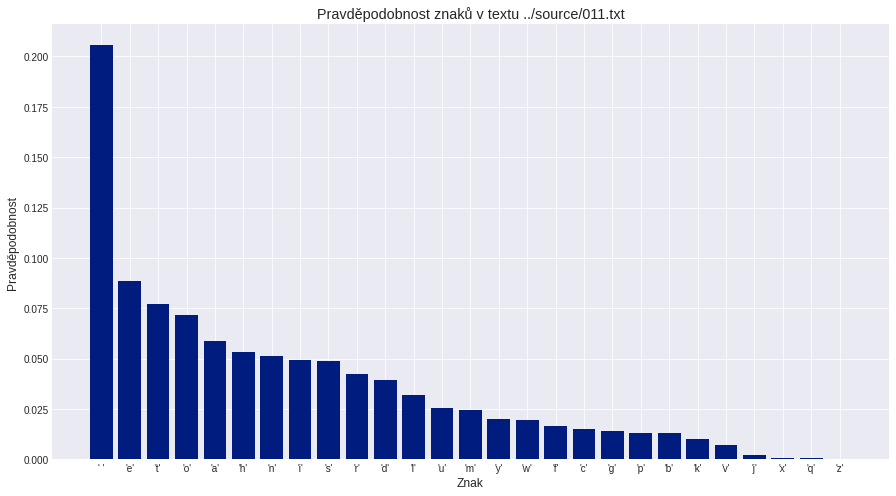

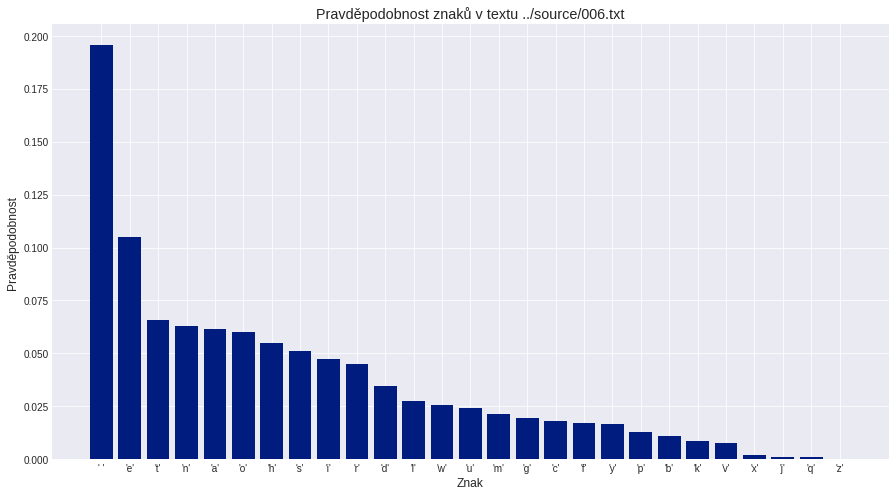

In [224]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use('seaborn-darkgrid')

def plot_probabilities(data, filename):
    plt.xlabel('Znak')
    plt.ylabel('Pravděpodobnost')
    x_values = range(len(data))
    plt.bar(x_values, [probability for char, probability in data])
    plt.xticks(x_values, ['\'{}\''.format(char) for char, probability in data])
    plt.title('Pravděpodobnost znaků v textu {}'.format(filename))
    plt.show()

plot_probabilities(probabilities1, f1.name)
plot_probabilities(probabilities2, f2.name)

## 2. Pro každý text zvlášť spočtěte entropii odhadnutého rozdělení znaků.
Entropii $H(X)$ diskrétní náhodné veličiny $X$ definujeme vztahem:

$H(X) = - \sum_{x \in X} p(x)\log p(x)$

In [225]:
def char_entropy(char_probabilities) -> float:
    entropy = 0
    for c, p in char_probabilities:
        entropy -= p * np.log2(p)
    return entropy

entropy1 = char_entropy(probabilities1)
entropy2 = char_entropy(probabilities2)
print('Entropie textu 1 je {}.'.format(entropy1))
print('Entropie textu 2 je {}.'.format(entropy2))

Entropie textu 1 je 4.0639057100402844.
Entropie textu 2 je 4.085023448817993.


## 3. Nalezněte optimální binární instantní kód C pro kódování znaků **prvního** z textů.

In [226]:
def get_split_values(word, word_part: int, old_code: str, code_char: str):
    char = word[word_part][0]
    probability = word[word_part][1]
    code = old_code + code_char
    return char, probability, code

def make_code(char_probabilities):
    if len(char_probabilities) <= 2:
        index = 0
        ret = []
        for c, p in char_probabilities:
            ret += [(c, p, str(index))]
            index += 1
        return ret

    two_least_probable = char_probabilities[-2:]
    new_combined = [(two_least_probable[0][0] + two_least_probable[1][0], two_least_probable[0][1] + two_least_probable[1][1])]
    ret2 = make_code(sorted(char_probabilities[:-2] + new_combined, key=lambda item: item[1], reverse=True))
    # print(ret2, char_probabilities, len(char_probabilities))
    new_list = []
    for char, p, code in ret2:
        if new_combined[0][0] == char:
            old_code = code
            new_list += [get_split_values(two_least_probable, 0, old_code, str(0))]
            new_list += [get_split_values(two_least_probable, 1, old_code, str(1))]
        else:
            new_list += [(char, p, code)]
    return new_list

instant_code1 = sorted(make_code(probabilities1), key=lambda item: item[1], reverse=True)
pd.DataFrame({'Kódová slova pro kód $C$': [code for _, _, code in instant_code1]}, index=['\'{}\''.format(char) for char, _, _ in instant_code1])

,Kódová slova pro kód $C$
' ',10
'e',0001
't',0011
'o',0100
'a',0110
'h',1100
'n',1101
'i',1111
's',00000
'r',00001


## 4. Pro každý text zvlášť spočtěte střední délku kódu C a porovnejte ji s entropií rozdělení znaků. Je kód C optimální i pro druhý text?


In [227]:
def average_code_length(instant_codes):
    avg_length = 0
    for _, p, code in instant_codes:
        avg_length += p * len(code)
    return avg_length

# Compute average length of C for text 1
avg_length1 = average_code_length(instant_code1)

# Compute optimal instant code for text 2
instant_code2_optimal = sorted(make_code(probabilities2), key=lambda item: item[1], reverse=True)
avg_length2_optimal = average_code_length(instant_code2_optimal)

# Use instant code C for text 2
instant_code2_c = []
for char1, _, code1 in instant_code1:
    for char2, p, _ in instant_code2_optimal:
        if char1 == char2:
            instant_code2_c += [(char1, p, code1)]

# Check average length of C for text 2
avg_length2_c = average_code_length(instant_code2_c)

# Compare optimal instant code with C for text 2
if avg_length2_optimal < avg_length2_c:
    print('Binární instantní kód textu 1 není optimalní pro text 2')
else:
    print('Binární instantní kód textu 1 je optimalní pro text 2')
print('Střední délka kódu C pro text 2 má délku {}, ale střední délka optimálního kódu pro text 2 má délku {}.'.format(avg_length2_c, avg_length2_optimal))

Binární instantní kód textu 1 není optimalní pro text 2
Střední délka kódu C pro text 2 má délku 4.141483516483518, ale střední délka optimálního kódu pro text 2 má délku 4.126545329670331.
